# Diamond Price Prediction Model

### Importing important Libraries :- 
* I have this data of diamond price, carat, color, clarity and etc.
* And I will be doing some of Data Cleaning and Data Wrangling with it. 


**So at first I am going to import the important Libraries that will came in work in this model** 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

### Second step will importing the data :- 

In [2]:
data = pd.read_csv(r"diamonds.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

* Here, x,y and z are length, width and depth respectively. 

### Data Cleaning :- 

In [5]:
data.drop(columns='Unnamed: 0',inplace=True)

* Dropping un-usefull column.

In [6]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.duplicated().sum()

0

* Here we can see there are zero nan values and zero duplicate values. 

* **Now here I am going to add a new column :-** 
   
   **"Size" = x * y * z**

In [9]:
data["Size"] = data['x'] * data['y'] * data['z']

In [10]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


* So now I will drop x, y, and z column as they are not needed. 

In [11]:
data.drop(columns=['x','y','z'],inplace = True)

# Removing Outlier :- 

In [12]:
data.describe()

,carat,depth,table,price,Size
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,129.826975
std,0.47339,1.429909,2.233679,3988.114460,78.160819
min,0.20000,43.000000,43.000000,326.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,65.190168
50%,0.70000,61.800000,57.000000,2401.000000,114.840180
75%,1.04000,62.500000,59.000000,5326.750000,170.823600
max,5.01000,79.000000,95.000000,18823.000000,3840.598060


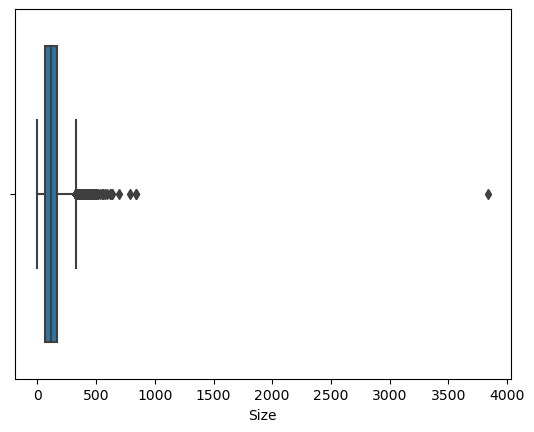

In [13]:
sns.boxplot(x = 'Size', data = data)
plt.show()

**We will remove outliear from IQR method (Interquatile Range)**

In [14]:
Q1 = data['Size'].quantile(0.25)
Q1

65.190168

In [15]:
Q3 = data['Size'].quantile(0.75)
Q3

170.8236

In [16]:
IQR = Q3 - Q1

In [17]:
Max = Q3 + (1.5*IQR)
Max

329.273748

In [18]:
Min = Q1 - (1.5*IQR)
Min 

-93.25998000000001

In [19]:
Sort_data = data[data['Size']<=329.273748]

<Axes: title={'center': 'After'}, xlabel='Size'>

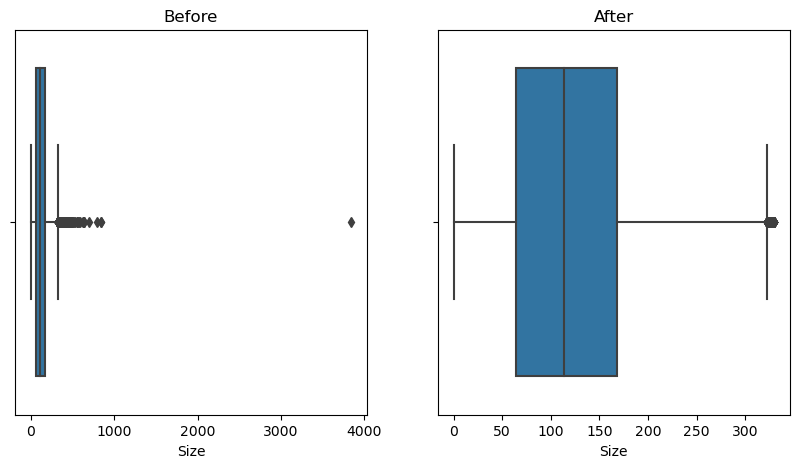

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Before')
sns.boxplot(x = 'Size', data = data)


plt.subplot(1,2,2)
plt.title('After')
sns.boxplot(x = 'Size', data = Sort_data)

**Now let’s have a look at the relationship between the size of a diamond and its price:**

In [21]:
Sort_data.head()

,carat,cut,color,clarity,depth,table,price,Size
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


**We can see a lot of overlapping data here.**

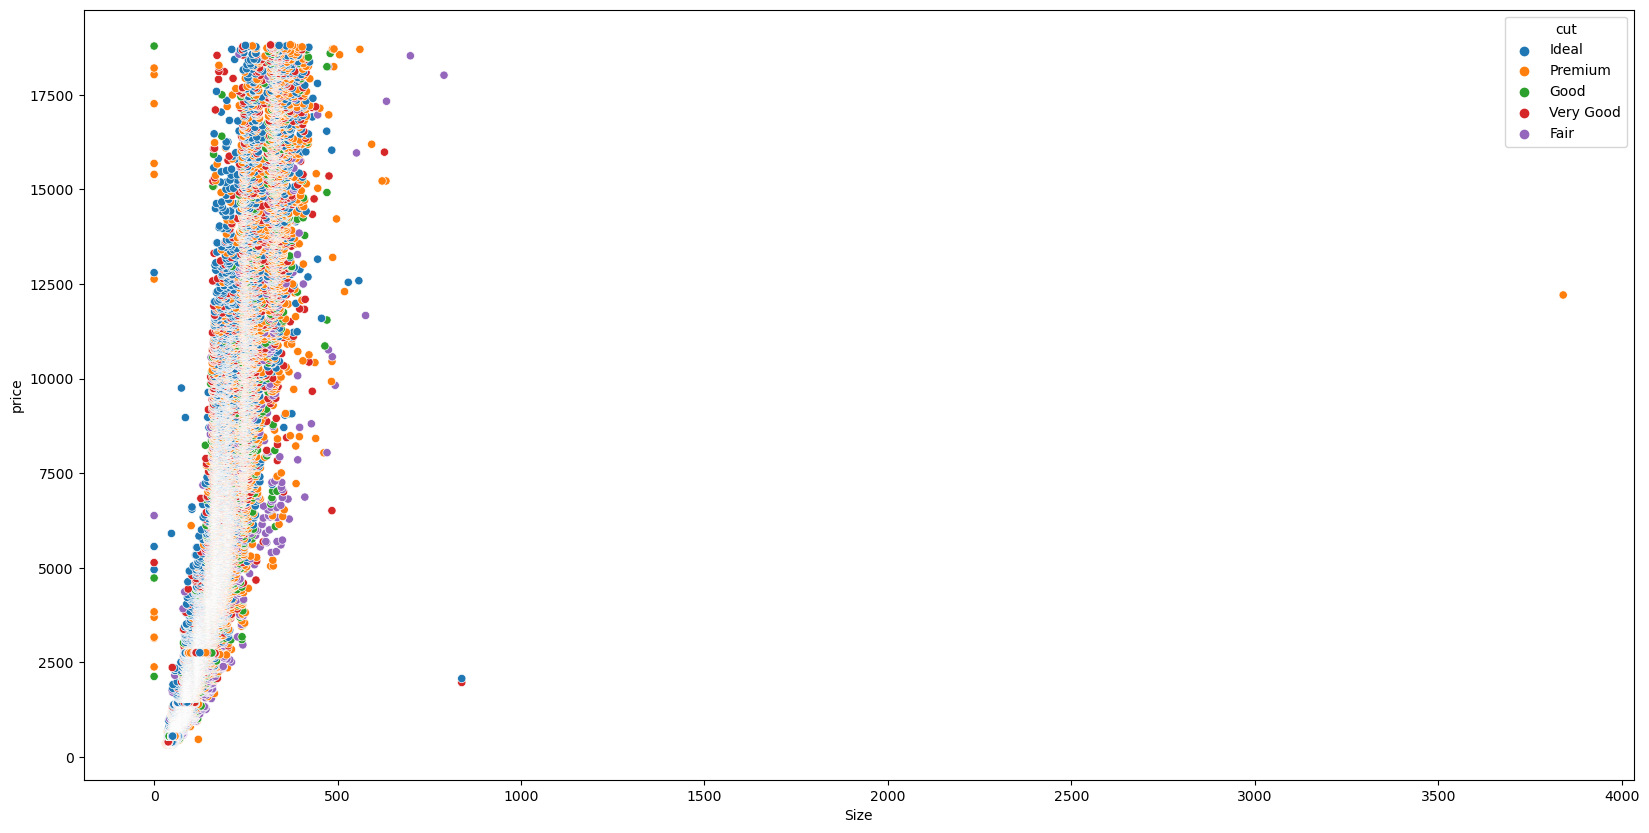

In [24]:
plt.figure(figsize=(20,10))
ax = plt.subplot()
sns.scatterplot(data = data, x = 'Size' , y = 'price' , hue = 'cut')

plt.show()

* The above figure concludes two features of diamonds:

  1. Premium cut diamonds are relatively large than other diamonds.
  2. There’s a linear relationship between the size of all types of diamonds and their prices.

**Now let’s have a look at the prices of all the types of diamonds based on their colour:** 

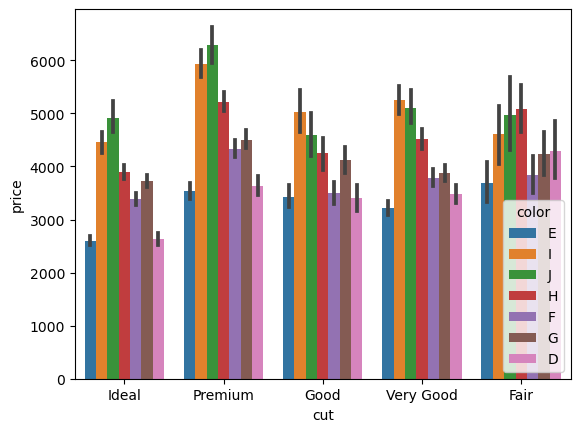

In [25]:
sns.barplot(data = data, x = 'cut' , y = 'price' , hue = 'color')
plt.show()

**Now let’s have a look at the prices of all the types of diamonds based on their clarity:**

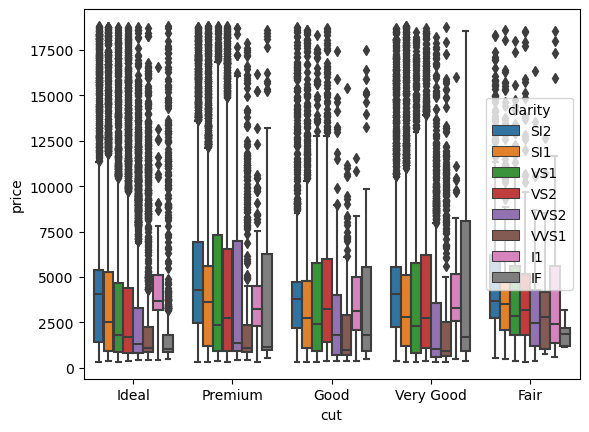

In [26]:
sns.boxplot(data = data , x = 'cut' , y = 'price' , hue = 'clarity')
plt.show()

**Now let’s have a look at the correlation between diamond prices and other features in the dataset:**

* So to do that I have to make sure that every data in the dataset is in integer or float value.

###  Ordinal Encoding :- 

In [27]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

* Making a duplicate data incase any mishappening. 

In [28]:
Sort_data

,carat,cut,color,clarity,depth,table,price,Size
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,140.766120


In [29]:
ord_data = [["Ideal","Premium","Good","Very Good","Fair"]]

In [30]:
oe = OrdinalEncoder(categories=ord_data)

In [31]:
Sort_data.loc[:,'cut'] = oe.fit_transform(Sort_data[['cut']])

In [32]:
Sort_data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
Size       float64
dtype: object

In [33]:
Sort_data['cut'] = Sort_data['cut'].astype('float64')

C:\Users\RGM\AppData\Local\Temp\ipykernel_3700\1489614897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sort_data['cut'] = Sort_data['cut'].astype('float64')


In [34]:
le = LabelEncoder()

In [35]:
object_col = Sort_data.select_dtypes(include = ["object"]).columns

In [36]:
object_col

Index(['color', 'clarity'], dtype='object')

In [37]:
Sort_data

,carat,cut,color,clarity,depth,table,price,Size
0,0.23,0.0,E,SI2,61.5,55.0,326,38.202030
1,0.21,1.0,E,SI1,59.8,61.0,326,34.505856
2,0.23,2.0,E,VS1,56.9,65.0,327,38.076885
3,0.29,1.0,I,VS2,62.4,58.0,334,46.724580
4,0.31,2.0,J,SI2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,0.0,D,SI1,60.8,57.0,2757,115.920000
53936,0.72,2.0,D,SI1,63.1,55.0,2757,118.110175
53937,0.70,3.0,D,SI1,62.8,60.0,2757,114.449728
53938,0.86,1.0,H,SI2,61.0,58.0,2757,140.766120


In [38]:
Sort_data[['color','clarity']] = Sort_data[['color','clarity']].apply(le.fit_transform)

C:\Users\RGM\AppData\Local\Temp\ipykernel_3700\3196088981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sort_data[['color','clarity']] = Sort_data[['color','clarity']].apply(le.fit_transform)


In [39]:
Sort_data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
Size       0
dtype: int64

* **So here the data is sorted and encoded**

In [40]:
Dataset = Sort_data

In [41]:
Dataset.corr()

,carat,cut,color,clarity,depth,table,price,Size
carat,1.000000,0.125147,0.251339,-0.197029,0.043362,0.182947,0.911404,0.996146
cut,0.125147,1.000000,0.016414,-0.090545,0.169918,0.384964,0.055037,0.113439
color,0.251339,0.016414,1.000000,-0.017801,0.052965,0.020127,0.120052,0.250044
clarity,-0.197029,-0.090545,-0.017801,1.000000,-0.054324,-0.086018,-0.042050,-0.193690
depth,0.043362,0.169918,0.052965,-0.054324,1.000000,-0.293553,0.004646,0.025298
table,0.182947,0.384964,0.020127,-0.086018,-0.293553,1.000000,0.121020,0.171874
price,0.911404,0.055037,0.120052,-0.042050,0.004646,0.121020,1.000000,0.910552
Size,0.996146,0.113439,0.250044,-0.193690,0.025298,0.171874,0.910552,1.000000


In [42]:
Dataset.head()

,carat,cut,color,clarity,depth,table,price,Size
0,0.23,0.0,1,3,61.5,55.0,326,38.202030
1,0.21,1.0,1,2,59.8,61.0,326,34.505856
2,0.23,2.0,1,4,56.9,65.0,327,38.076885
3,0.29,1.0,5,5,62.4,58.0,334,46.724580
4,0.31,2.0,6,3,63.3,58.0,335,51.917250


**Here we can see a lot of overlapping data in our plots, so we will go for the K- Nearest Neighbour algorithm.**

D:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


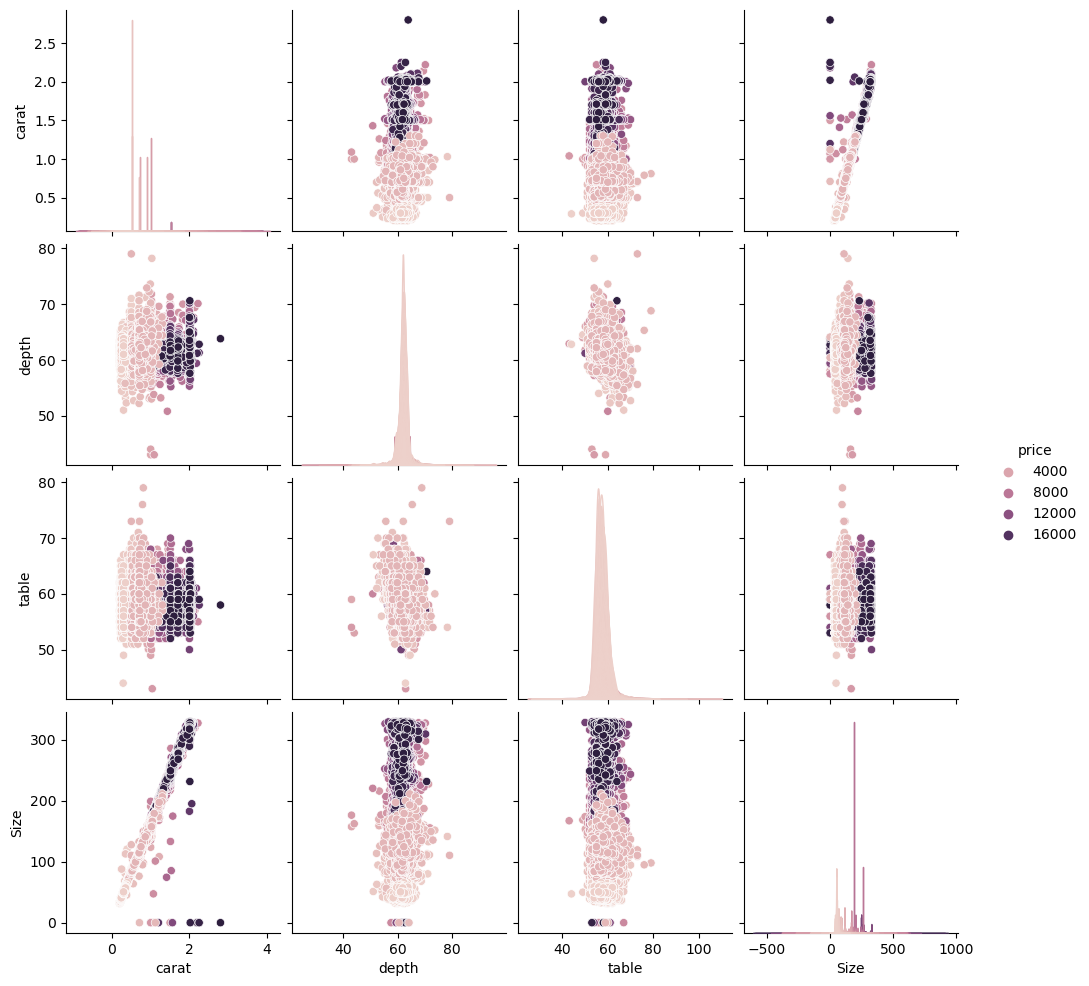

In [22]:
sns.pairplot(data = Sort_data, hue = "price")
plt.show()

In [123]:
x = Dataset.drop(columns=['price','color','table','depth','cut'])
y = Dataset['price'] 

In [124]:
x

,carat,clarity,Size
0,0.23,3,38.202030
1,0.21,2,34.505856
2,0.23,4,38.076885
3,0.29,5,46.724580
4,0.31,3,51.917250
...,...,...,...
53935,0.72,2,115.920000
53936,0.72,2,118.110175
53937,0.70,2,114.449728
53938,0.86,3,140.766120


# Train and Testing the data :- 

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [127]:
for i in range(14,20):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    print(i , knn.score(x_train,y_train)*100 , knn.score(x_test,y_test)*100)

14 92.51120787592077 91.36773587677666
15 92.36579039951367 91.33710798109958
16 92.24764514402104 91.32182868218909
17 92.14608903722433 91.29239644918721
18 92.05903967607419 91.26147937409206
19 91.98822086540744 91.19324980552527


**So here we can see that n_neighbors from 15 to 18 are the perfect fit, so will be choosing the least difference in both scores.** 

In [133]:
92.05903967607419 - 91.26147937409206    #18 (diff - 0.7975603019821307)

0.7975603019821307

**So I will going to choose n_neighbour for our KNN algorithm will be 18 as it is less under fitted.**

In [128]:
knn = KNeighborsRegressor(n_neighbors=18)

In [129]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=18)

In [130]:
model_score = print("The model's training Score is :",knn.score(x_train,y_train)*100,"\n", "The model's testing Score is :",knn.score(x_test,y_test)*100)


The model's training Score is : 92.05903967607419 
 The model's testing Score is : 91.26147937409206


**Now below is how we can use our machine learning model to predict the price of a diamond:**

# Please place your inputs below :- 

In [136]:
a = float(input("Carat (How much Carat is your diamond is) : "))
b = int(input("Cut Type --> (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size of the diamond: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price = ", knn.predict(features))

Carat (How much Carat is your diamond is) : 15
Cut Type --> (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 15
Size of the diamond: 12
Predicted Diamond's Price =  [9449.72222222]


D:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## According to the diamond price analysis, we can say that the price and size of premium diamonds are higher than other types of diamonds. I hope you liked this article on Diamond Price analysis and prediction using Python. Feel free to ask valuable questions.